<a href="https://colab.research.google.com/github/KabaTubare/KabaTubare/blob/main/audioseal_detection_only_v1_25_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installation commands
!pip install torchaudio
!pip install matplotlib
!pip install audioseal # Ensure this matches the actual package name for AudioSeal


In [ ]:
import io
import torch
import torchaudio
import matplotlib.pyplot as plt
from IPython.display import Audio as IPythonAudio
from google.colab import files

In [ ]:
# Attempt to import AudioSeal for watermark detection
try:
    from audioseal import AudioSeal
    audioseal_available = True
    print("AudioSeal is available for watermark detection.")
except ImportError:
    audioseal_available = False
    print("AudioSeal is not available. Please ensure it's correctly installed.")

AudioSeal is available for watermark detection.


In [ ]:
def upload_sample_audio():
    """Use Google Colab's file upload dialog to upload and load a sample audio file."""
    uploaded = files.upload()  # Display the file upload dialog
    if not uploaded:
        print("No file uploaded.")
        return None, None
    file_name = next(iter(uploaded))
    waveform, sample_rate = torchaudio.load(io.BytesIO(uploaded[file_name]))
    return waveform, sample_rate

In [ ]:
def plot_waveform_and_specgram(waveform, sample_rate, title="Audio"):
    """Plot the waveform and spectrogram of the audio."""
    fig, axs = plt.subplots(2, figsize=(20, 10))
    axs[0].plot(waveform.t().numpy())
    axs[0].set_title(f'{title} Waveform')
    axs[0].set_ylabel('Amplitude')
    specgram = torchaudio.transforms.Spectrogram()(waveform)
    axs[1].imshow(specgram.log2()[0,:,:].numpy(), cmap='viridis', aspect='auto')
    axs[1].set_title(f'{title} Spectrogram')
    axs[1].set_ylabel('Frequency bins')
    axs[1].set_xlabel('Time frames')
    plt.show()

In [ ]:
def play_audio(waveform, sample_rate):
    """Play the uploaded audio."""
    display(IPythonAudio(waveform.numpy(), rate=sample_rate))


In [ ]:
def detect_watermark(waveform, sample_rate):
    """Detect watermark in the uploaded audio using AudioSeal."""
    if audioseal_available:
        detector = AudioSeal.load_detector("audioseal_detector_16bits")
        result, message = detector.detect_watermark(waveform.unsqueeze(0), message_threshold=0.5)
        print(f"Detection result: {'Watermarked or AI-Generated audio' if result else 'Not watermarked or AI-Generated'}")
    else:
        print("Watermark detection not available. AudioSeal is not installed.")


Saving human-voice-1-tw.mp3 to human-voice-1-tw.mp3


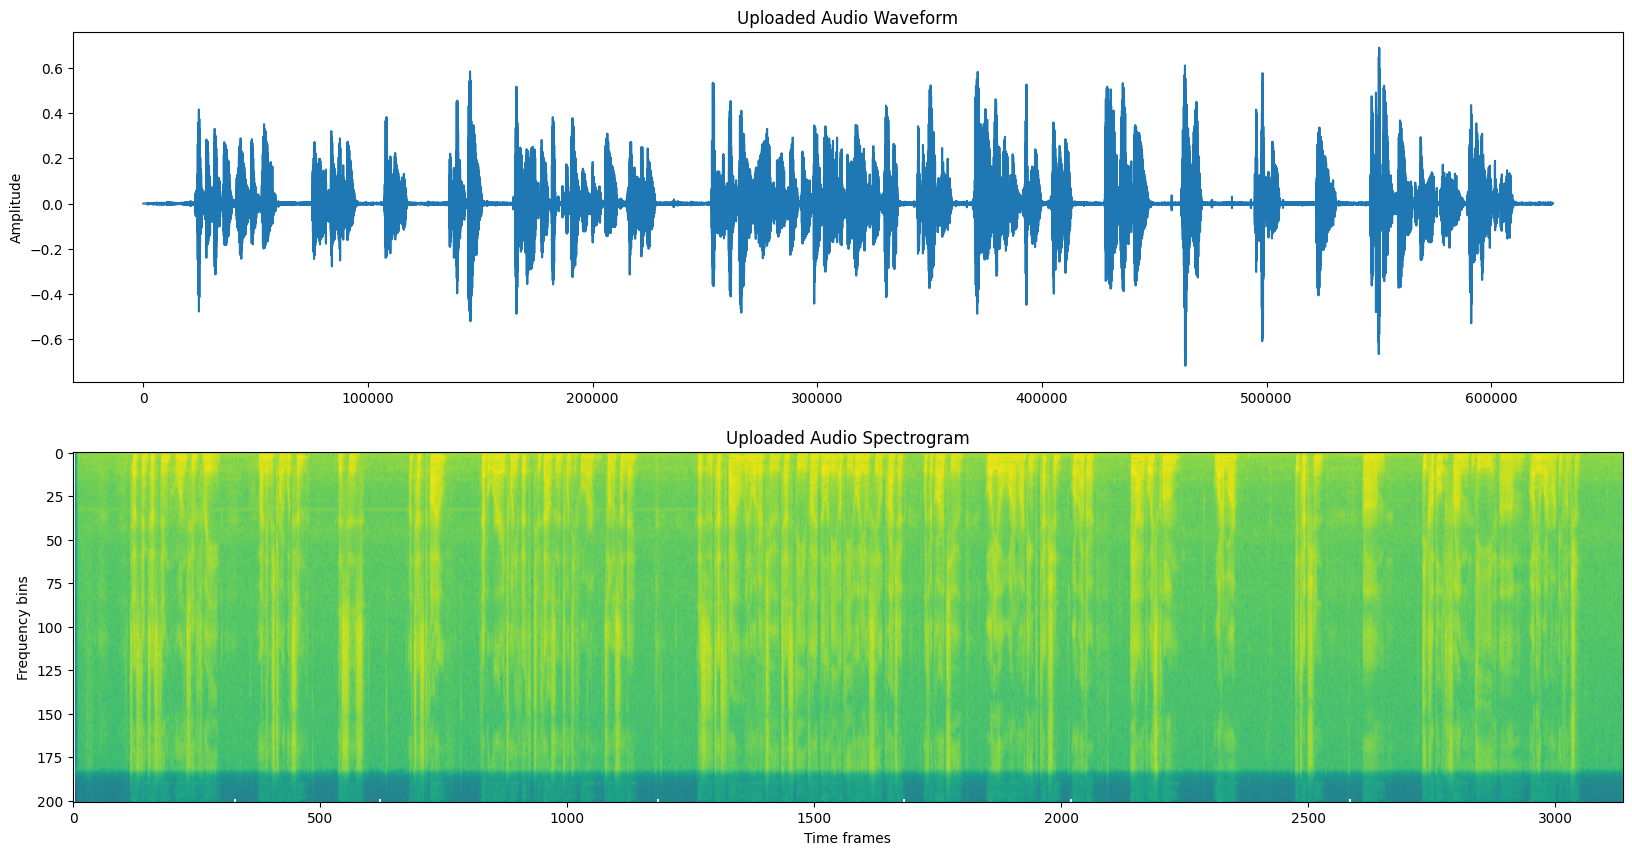

Downloading: "https://dl.fbaipublicfiles.com/audioseal/6edcf62f/detector.pth" to /root/.cache/audioseal/d377e551c354e9b70cb7ebd5
100%|██████████| 33.1M/33.1M [00:00<00:00, 125MB/s]


Detection result: Watermarked or AI-Generated audio


In [ ]:

# Main script execution
if __name__ == "__main__":
    audio, sr = upload_sample_audio()
    if audio is not None and sr is not None:
        plot_waveform_and_specgram(audio, sr, "Uploaded Audio")
        play_audio(audio, sr)
        detect_watermark(audio, sr)
    else:
        print("Audio upload failed. Please try again.")
